In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tabulate import tabulate

In [2]:
# Load dataset
file_path = "/content/Data_set1.csv"
df = pd.read_csv(file_path)

In [3]:
print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nMissing values:")
print(df.isnull().sum())


First 5 rows:
  Soil_Color  Nitrogen  Phosphorus  Potassium   pH  Rainfall  Temperature  \
0      Black        75          50        100  6.5      1000           20   
1      Black        80          50        100  6.5      1000           20   
2      Black        85          50        100  6.5      1000           20   
3      Black        90          50        100  6.5      1000           20   
4      Black        95          50        100  6.5      1000           20   

   Crop_Type Fertilizer_Name  
0  Sugarcane            Urea  
1  Sugarcane            Urea  
2  Sugarcane            Urea  
3  Sugarcane            Urea  
4  Sugarcane            Urea  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Soil_Color       4513 non-null   object 
 1   Nitrogen         4513 non-null   int64  
 2   Phosphorus       4513 non-n

In [4]:
# Data Cleaning: Drop duplicates, fill or drop NA
print("\nShape before cleaning:", df.shape)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print("Shape after cleaning:", df.shape)


Shape before cleaning: (4513, 9)
Shape after cleaning: (4513, 9)


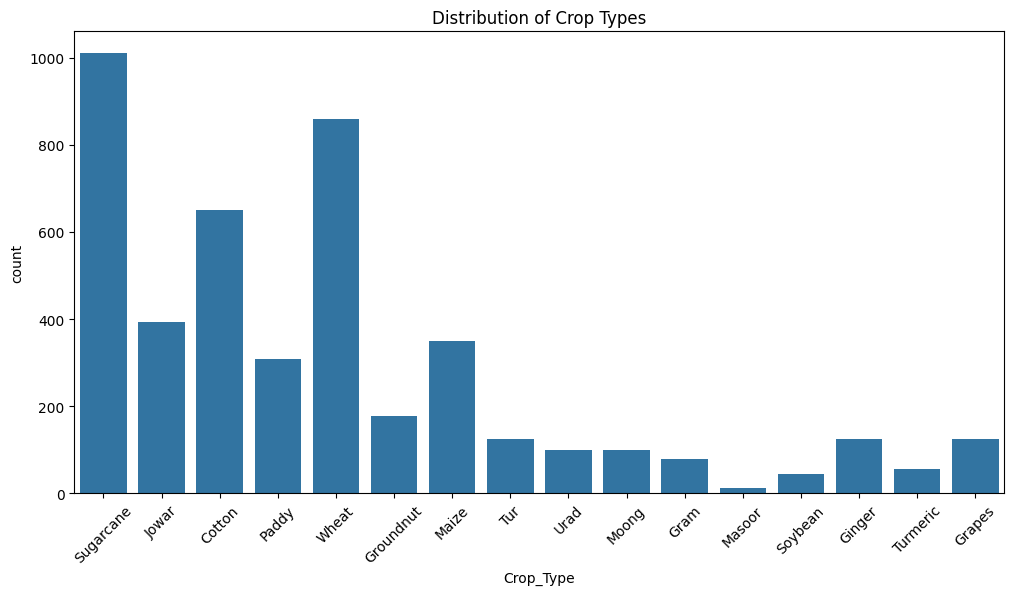

In [5]:
# EDA: Basic distributions
plt.figure(figsize=(12,6))
sns.countplot(x='Crop_Type', data=df)
plt.title('Distribution of Crop Types')
plt.xticks(rotation=45)
plt.show()


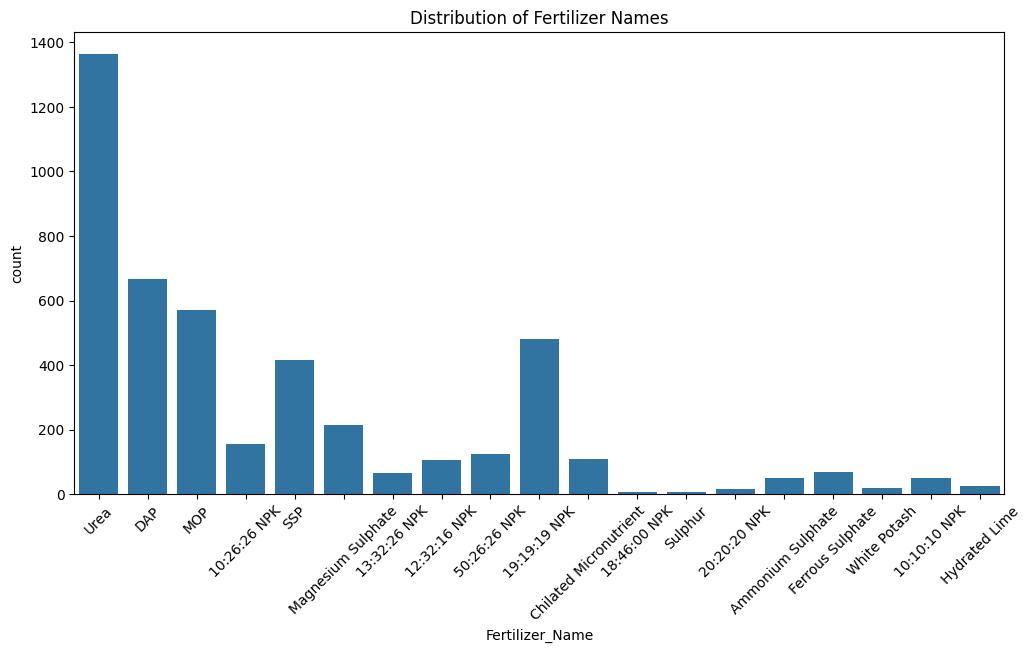

In [6]:

plt.figure(figsize=(12,6))
sns.countplot(x='Fertilizer_Name', data=df)
plt.title('Distribution of Fertilizer Names')
plt.xticks(rotation=45)
plt.show()

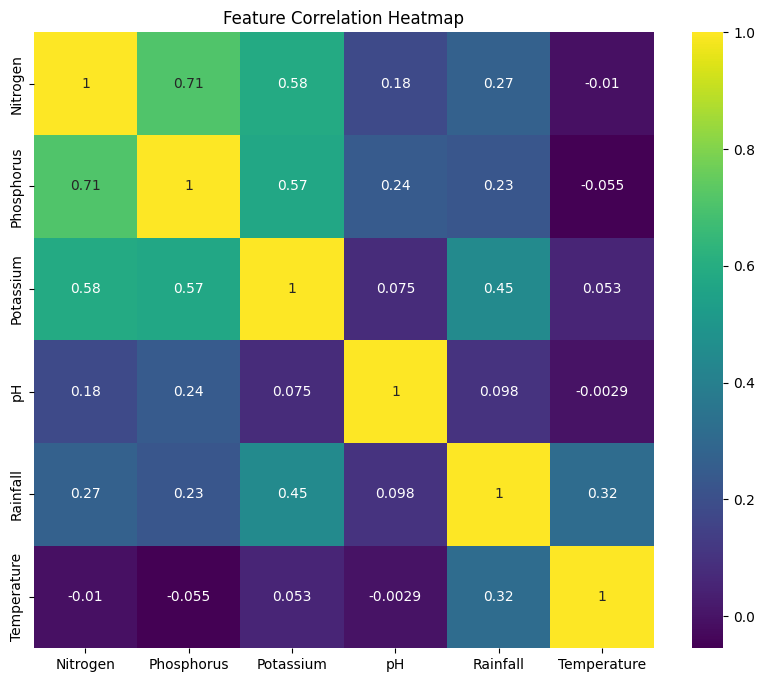

In [8]:
# Correlation heatmap
plt.figure(figsize=(10,8))
# Drop non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()

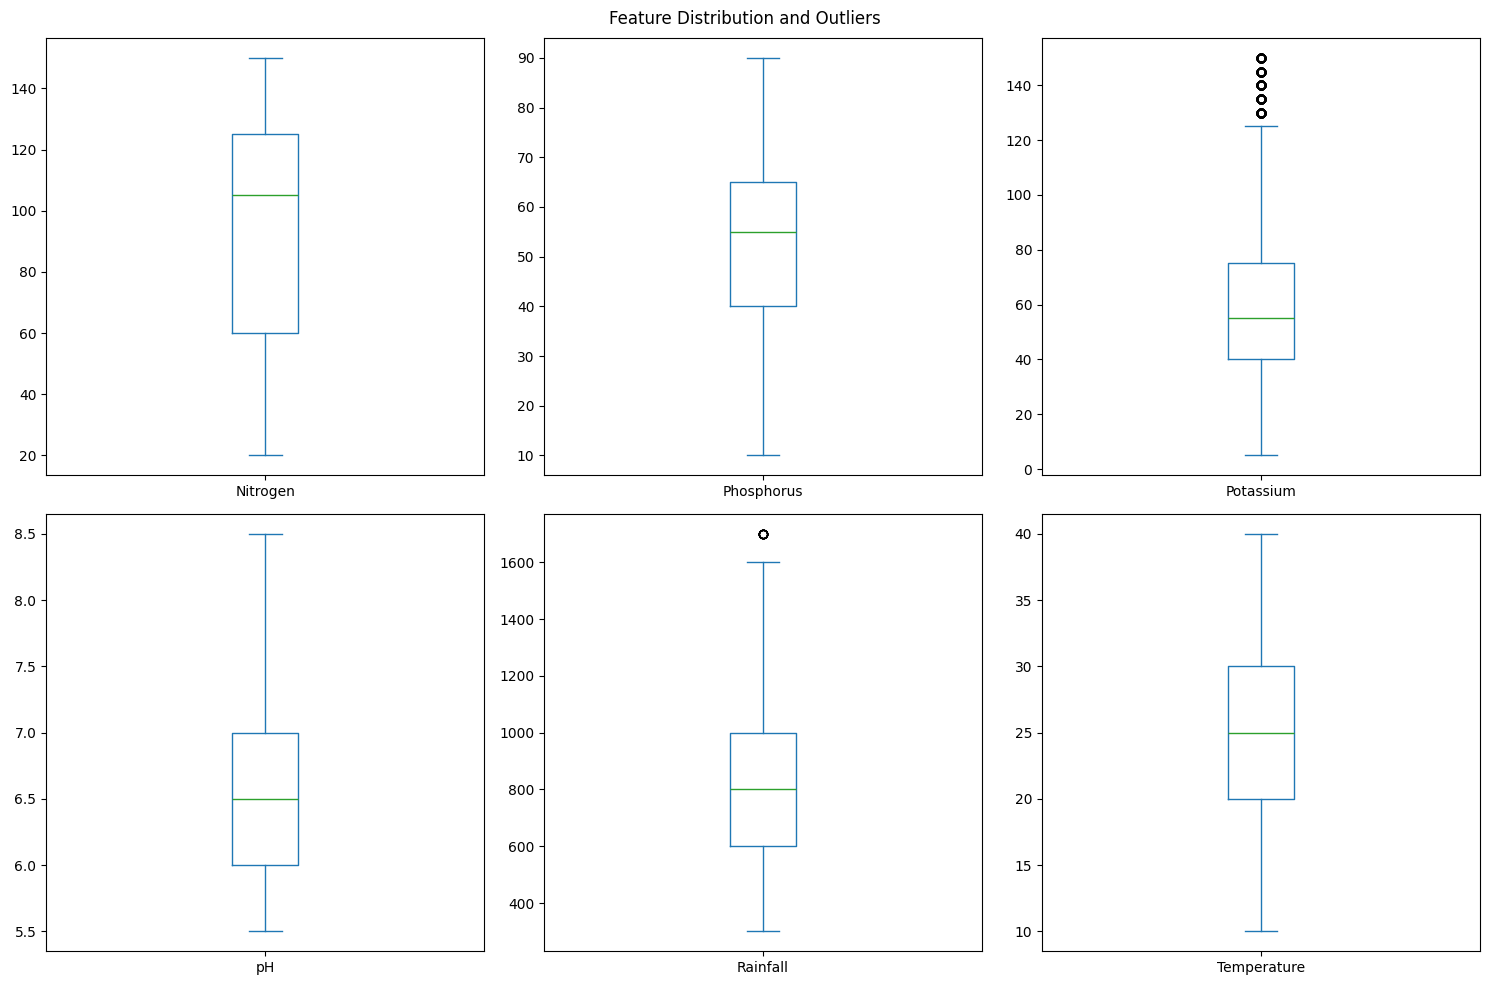

In [9]:
# Boxplots for outlier detection
features_to_plot = ['Nitrogen','Phosphorus','Potassium','pH','Rainfall','Temperature']
df[features_to_plot].plot(kind='box', subplots=True, layout=(2,3), figsize=(15,10), title='Feature Distribution and Outliers')
plt.tight_layout()
plt.show()

In [10]:
# Label Encoding
label_encoder_soil = LabelEncoder()
df['Soil_Color'] = label_encoder_soil.fit_transform(df['Soil_Color'])
label_encoder_crop = LabelEncoder()
df['Crop_Type'] = label_encoder_crop.fit_transform(df['Crop_Type'])
label_encoder_fertilizer = LabelEncoder()
df['Fertilizer_Name'] = label_encoder_fertilizer.fit_transform(df['Fertilizer_Name'])

In [11]:
# Feature and target splitting
X_crop = df[['Soil_Color','Nitrogen','Phosphorus','Potassium','pH','Rainfall','Temperature']]
y_crop = df['Crop_Type']
X_fertilizer = df[['Crop_Type','Soil_Color','Nitrogen','Phosphorus','Potassium','pH','Rainfall','Temperature']]
y_fertilizer = df['Fertilizer_Name']

In [12]:
X_crop_train, X_crop_test, y_crop_train, y_crop_test = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)
X_fertilizer_train, X_fertilizer_test, y_fertilizer_train, y_fertilizer_test = train_test_split(X_fertilizer, y_fertilizer, test_size=0.2, random_state=42)


In [13]:
# Model dictionary
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42)
}

In [14]:
results = []

In [15]:
for name, model in models.items():
    # Crop
    model.fit(X_crop_train, y_crop_train)
    y_pred_crop = model.predict(X_crop_test)
    y_prob_crop = model.predict_proba(X_crop_test)
    roc_crop = roc_auc_score(label_binarize(y_crop_test, classes=np.unique(y_crop)), y_prob_crop, multi_class='ovr', average='weighted')
    # Fertilizer
    model.fit(X_fertilizer_train, y_fertilizer_train)
    y_pred_fert = model.predict(X_fertilizer_test)
    y_prob_fert = model.predict_proba(X_fertilizer_test)
    roc_fert = roc_auc_score(label_binarize(y_fertilizer_test, classes=np.unique(y_fertilizer)), y_prob_fert, multi_class='ovr', average='weighted')
    # Append results
    results.append([
        name,
        f"{accuracy_score(y_crop_test, y_pred_crop):.4f}", f"{precision_score(y_crop_test, y_pred_crop, average='weighted'):.4f}",
        f"{recall_score(y_crop_test, y_pred_crop, average='weighted'):.4f}", f"{f1_score(y_crop_test, y_pred_crop, average='weighted'):.4f}", f"{roc_crop:.4f}",
        f"{accuracy_score(y_fertilizer_test, y_pred_fert):.4f}", f"{precision_score(y_fertilizer_test, y_pred_fert, average='weighted'):.4f}",
        f"{recall_score(y_fertilizer_test, y_pred_fert, average='weighted'):.4f}", f"{f1_score(y_fertilizer_test, y_pred_fert, average='weighted'):.4f}", f"{roc_fert:.4f}"
    ])


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [16]:
headers = ["Model","Crop Acc","Crop Prec","Crop Recall","Crop F1","Crop ROC-AUC","Fert Acc","Fert Prec","Fert Recall","Fert F1","Fert ROC-AUC"]
print(tabulate(results, headers=headers, tablefmt="grid"))

+---------------------+------------+-------------+---------------+-----------+----------------+------------+-------------+---------------+-----------+----------------+
| Model               |   Crop Acc |   Crop Prec |   Crop Recall |   Crop F1 |   Crop ROC-AUC |   Fert Acc |   Fert Prec |   Fert Recall |   Fert F1 |   Fert ROC-AUC |
+=====================+============+=============+===============+===========+================+============+=============+===============+===========+================+
| Decision Tree       |     0.9956 |      0.9957 |        0.9956 |    0.9956 |         0.9975 |     0.9767 |      0.9775 |        0.9767 |    0.9768 |         0.9871 |
+---------------------+------------+-------------+---------------+-----------+----------------+------------+-------------+---------------+-----------+----------------+
| Random Forest       |     0.9967 |      0.9967 |        0.9967 |    0.9967 |         1      |     0.948  |      0.9492 |        0.948  |    0.9476 |         0

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

et_crop_cv = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_fert_cv = ExtraTreesClassifier(n_estimators=100, random_state=42)


In [27]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

# Define scorers
f1_scorer = make_scorer(f1_score, average='weighted')
roc_scorer = make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr', average='weighted')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n🌿 Crop Recommendation CV Scores (Extra Trees):")
cv_acc_crop = cross_val_score(et_crop_cv, X_crop, y_crop, cv=cv, scoring='accuracy')
cv_f1_crop = cross_val_score(et_crop_cv, X_crop, y_crop, cv=cv, scoring=f1_scorer)
cv_roc_crop = cross_val_score(et_crop_cv, X_crop, y_crop, cv=cv, scoring=roc_scorer)
print(f"CV Accuracy: Mean={cv_acc_crop.mean():.4f}, Std={cv_acc_crop.std():.4f}")
print(f"CV F1 Score: Mean={cv_f1_crop.mean():.4f}, Std={cv_f1_crop.std():.4f}")
print(f"CV ROC-AUC: Mean={cv_roc_crop.mean():.4f}, Std={cv_roc_crop.std():.4f}")

print("\n🧪 Fertilizer Recommendation CV Scores (Extra Trees):")
cv_acc_fert = cross_val_score(et_fert_cv, X_fertilizer, y_fertilizer, cv=cv, scoring='accuracy')
cv_f1_fert = cross_val_score(et_fert_cv, X_fertilizer, y_fertilizer, cv=cv, scoring=f1_scorer)
cv_roc_fert = cross_val_score(et_fert_cv, X_fertilizer, y_fertilizer, cv=cv, scoring=roc_scorer)
print(f"CV Accuracy: Mean={cv_acc_fert.mean():.4f}, Std={cv_acc_fert.std():.4f}")
print(f"CV F1 Score: Mean={cv_f1_fert.mean():.4f}, Std={cv_f1_fert.std():.4f}")
print(f"CV ROC-AUC: Mean={cv_roc_fert.mean():.4f}, Std={cv_roc_fert.std():.4f}")



🌿 Crop Recommendation CV Scores (Extra Trees):
CV Accuracy: Mean=0.9991, Std=0.0008
CV F1 Score: Mean=0.9991, Std=0.0008
CV ROC-AUC: Mean=nan, Std=nan

🧪 Fertilizer Recommendation CV Scores (Extra Trees):
CV Accuracy: Mean=0.9645, Std=0.0065
CV F1 Score: Mean=0.9645, Std=0.0065
CV ROC-AUC: Mean=nan, Std=nan


In [19]:
pip install scikit-posthocs


Friedman Test for Crop Recommendation: Statistic: 28.2697, p-value: 0.0001
Significant differences found, performing Nemenyi post-hoc test:


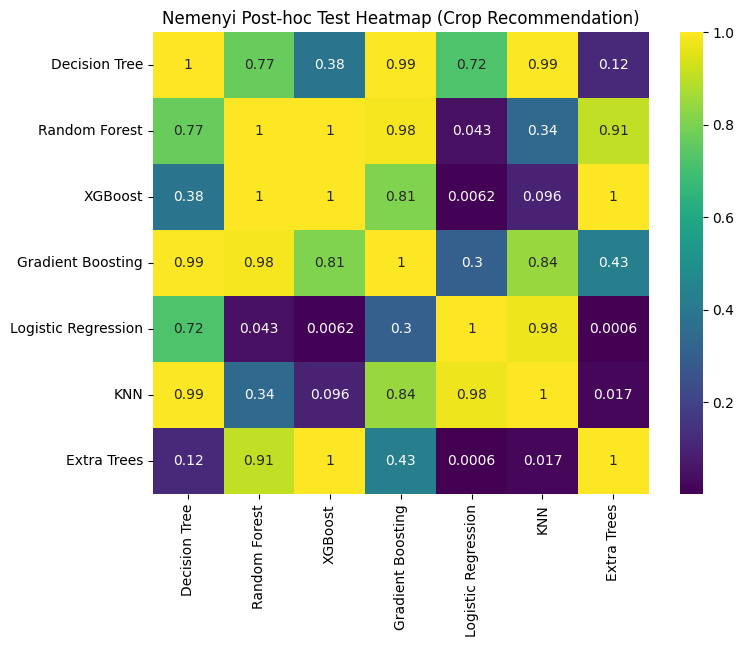


Model Ranking for Crop Recommendation based on mean performance:
1. Extra Trees - Mean Score: 1.0000
2. XGBoost - Mean Score: 0.9982
3. Random Forest - Mean Score: 0.9974
4. Gradient Boosting - Mean Score: 0.9965
5. Decision Tree - Mean Score: 0.9960
6. KNN - Mean Score: 0.9675
7. Logistic Regression - Mean Score: 0.7875

✅ Best model for Crop Recommendation recommendation: Extra Trees with mean score 1.0000

Friedman Test for Fertilizer Recommendation: Statistic: 29.1799, p-value: 0.0001
Significant differences found, performing Nemenyi post-hoc test:


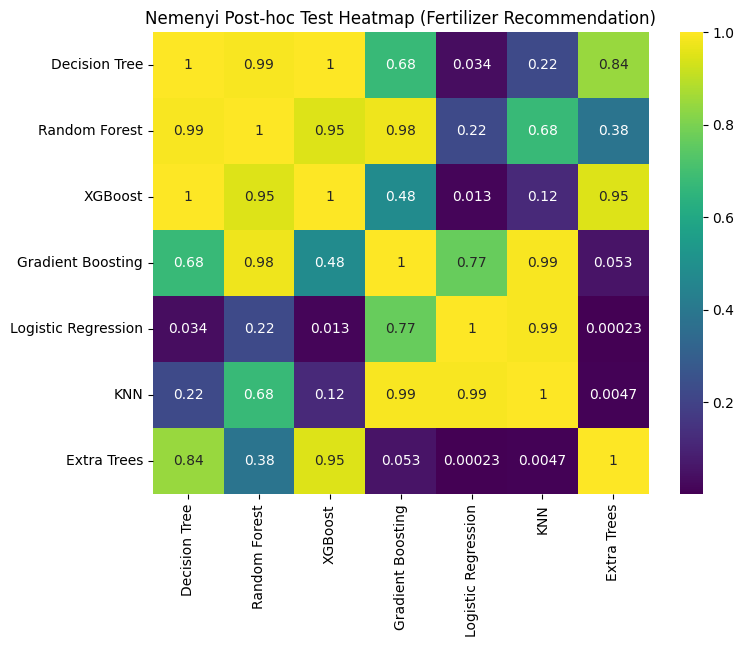


Model Ranking for Fertilizer Recommendation based on mean performance:
1. Extra Trees - Mean Score: 0.9829
2. XGBoost - Mean Score: 0.9812
3. Decision Tree - Mean Score: 0.9790
4. Random Forest - Mean Score: 0.9579
5. Gradient Boosting - Mean Score: 0.7253
6. KNN - Mean Score: 0.6192
7. Logistic Regression - Mean Score: 0.4791

✅ Best model for Fertilizer Recommendation recommendation: Extra Trees with mean score 0.9829


In [21]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics for Crop
crop_data = pd.DataFrame({
    'Decision Tree': [0.9956, 0.9957, 0.9956, 0.9956, 0.9975],
    'Random Forest': [0.9967, 0.9967, 0.9967, 0.9967, 1.0000],
    'XGBoost': [0.9978, 0.9978, 0.9978, 0.9978, 1.0000],
    'Gradient Boosting': [0.9956, 0.9959, 0.9956, 0.9956, 1.0000],
    'Logistic Regression': [0.7431, 0.7447, 0.7431, 0.7409, 0.9658],
    'KNN': [0.9590, 0.9610, 0.9590, 0.9592, 0.9993],
    'Extra Trees': [1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
})

# Metrics for Fertilizer
fert_data = pd.DataFrame({
    'Decision Tree': [0.9767, 0.9775, 0.9767, 0.9768, 0.9871],
    'Random Forest': [0.9480, 0.9492, 0.9480, 0.9476, 0.9967],
    'XGBoost': [0.9767, 0.9778, 0.9767, 0.9767, 0.9980],
    'Gradient Boosting': [0.6744, 0.6811, 0.6744, 0.6725, 0.9242],
    'Logistic Regression': [0.4031, 0.4078, 0.4031, 0.3632, 0.8181],
    'KNN': [0.5482, 0.5434, 0.5482, 0.5427, 0.9137],
    'Extra Trees': [0.9790, 0.9794, 0.9790, 0.9789, 0.9984]
})

def friedman_nemenyi_analysis(data, task_name):
    stat, p = friedmanchisquare(*[data[col] for col in data.columns])
    print(f"\nFriedman Test for {task_name}: Statistic: {stat:.4f}, p-value: {p:.4f}")
    if p < 0.05:
        print("Significant differences found, performing Nemenyi post-hoc test:")
        nemenyi = posthoc_nemenyi_friedman(data.values)
        nemenyi.columns = data.columns
        nemenyi.index = data.columns
        plt.figure(figsize=(8, 6))
        sns.heatmap(nemenyi, annot=True, cmap='viridis')
        plt.title(f'Nemenyi Post-hoc Test Heatmap ({task_name})')
        plt.show()

        means = data.mean().sort_values(ascending=False)
        print(f"\nModel Ranking for {task_name} based on mean performance:")
        for rank, (model, score) in enumerate(means.items(), start=1):
            print(f"{rank}. {model} - Mean Score: {score:.4f}")

        best_model = means.idxmax()
        print(f"\n✅ Best model for {task_name} recommendation: {best_model} with mean score {means.max():.4f}")
    else:
        print("No significant differences found among models.")

friedman_nemenyi_analysis(crop_data, "Crop Recommendation")
friedman_nemenyi_analysis(fert_data, "Fertilizer Recommendation")


In [33]:
# Fit Extra Trees for crop
et_crop = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_crop.fit(X_crop, y_crop)

# Fit Extra Trees for fertilizer
et_fert = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_fert.fit(X_fertilizer, y_fertilizer)


ExtraTreesClassifier(random_state=42)

In [34]:
def recommend_crop_and_fertilizer():
    print("\n🌾 Enter Soil and Environment Details for Recommendation:")
    soil_color_input = input("Soil Color: ").strip()
    nitrogen = float(input("Nitrogen: "))
    phosphorus = float(input("Phosphorus: "))
    potassium = float(input("Potassium: "))
    pH = float(input("pH: "))
    rainfall = float(input("Rainfall: "))
    temperature = float(input("Temperature: "))

    soil_color_enc = label_encoder_soil.transform([soil_color_input])[0]
    input_features = np.array([[soil_color_enc, nitrogen, phosphorus, potassium, pH, rainfall, temperature]])

    # Predict crop
    crop_probs = et_crop.predict_proba(input_features)[0]
    best_crop_idx = np.argmax(crop_probs)
    best_crop = label_encoder_crop.inverse_transform([best_crop_idx])[0]
    print(f"\n✅ Recommended Crop: {best_crop}")

    # Predict fertilizer for best crop
    fert_features = np.array([[best_crop_idx, soil_color_enc, nitrogen, phosphorus, potassium, pH, rainfall, temperature]])
    fert_probs = et_fert.predict_proba(fert_features)[0]
    best_fert_idx = np.argmax(fert_probs)
    best_fert = label_encoder_fertilizer.inverse_transform([best_fert_idx])[0]
    print(f"✅ Recommended Fertilizer: {best_fert}")

    # Alternative 3 crops and fertilizers
    print("\n🌾 Alternative Crop Recommendations and Fertilizers:")
    alt_crop_indices = crop_probs.argsort()[-4:][::-1]
    alt_crop_indices = [idx for idx in alt_crop_indices if idx != best_crop_idx][:3]

    for idx in alt_crop_indices:
        alt_crop = label_encoder_crop.inverse_transform([idx])[0]
        fert_features_alt = np.array([[idx, soil_color_enc, nitrogen, phosphorus, potassium, pH, rainfall, temperature]])
        fert_probs_alt = et_fert.predict_proba(fert_features_alt)[0]
        alt_fert_idx = np.argmax(fert_probs_alt)
        alt_fert = label_encoder_fertilizer.inverse_transform([alt_fert_idx])[0]
        print(f"- {alt_crop} ➔ Recommended Fertilizer: {alt_fert}")

# Run the module
recommend_crop_and_fertilizer()



🌾 Enter Soil and Environment Details for Recommendation:
Soil Color: Black
Nitrogen: 75
Phosphorus: 50
Potassium: 100
pH: 6.5
Rainfall: 1000
Temperature: 20

✅ Recommended Crop: Sugarcane
✅ Recommended Fertilizer: Urea

🌾 Alternative Crop Recommendations and Fertilizers:
- Wheat ➔ Recommended Fertilizer: Urea
- Turmeric ➔ Recommended Fertilizer: Urea
- Urad ➔ Recommended Fertilizer: Urea


In [35]:
import joblib

# Save the fitted Extra Trees Crop model
joblib.dump(et_crop, "extra_tree_crop_model.pkl")

# Save the fitted Extra Trees Fertilizer model
joblib.dump(et_fert, "extra_tree_fertilizer_model.pkl")

# Also save label encoders to ensure correct decoding later
joblib.dump(label_encoder_soil, "label_encoder_soil.pkl")
joblib.dump(label_encoder_crop, "label_encoder_crop.pkl")
joblib.dump(label_encoder_fertilizer, "label_encoder_fertilizer.pkl")

print("✅ Models and encoders saved successfully!")


✅ Models and encoders saved successfully!
